# Chord plots

are one of nicest visualization tools fitted to show the number and fraction of interactions between different enteties. As such, they are a great fit to display the migration patterns of scientists. In this kernel, I use plotly to display the graph of scientific migrations.

In [1]:
%pylab inline

import pandas as pd
import pickle as pk

import seaborn as sns
# sns.set(style="whitegrid")
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.5, color_codes=False, rc=None)

Populating the interactive namespace from numpy and matplotlib


In [2]:
scientists_df = pd.read_csv('../input/ORCID_migrations_2016_12_16_by_person.csv', index_col = 0)

In [3]:
scientists_df.shape

(741867, 7)

In [4]:
scientists_df.head(2)

,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
orcid_id,,,,,,,
0000-0001-5000-0138,NaN,CO,2014.0,CO,False,NaN,False
0000-0001-5000-0736,2006.0,NaN,NaN,NaN,True,PT,False


In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

## Distribution of the number of migrations  from each country

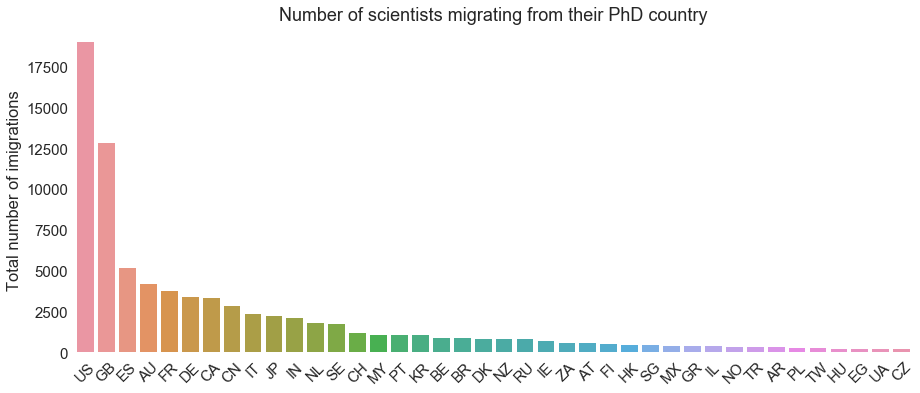

In [6]:
figure(figsize=(15,6))
'''
groupby.sum() adds all different occurances of each country
Then we sort by the number of scientists who have migrated.
'''
most = scientists_df.groupby("phd_country").sum().sort_values(by="has_migrated", ascending=False).head(40)
most["phd_country"] = most.index
ax = sns.barplot(x="phd_country", y="has_migrated", data=most)
plt.xticks(rotation=45)
ax.set_ylabel('Total number of imigrations')
ax.set_xlabel(' ')
ax.set_title('Number of scientists migrating from their PhD country')
ax.grid(0)
ax.set_frame_on(False)

* US has the most number of imigratations, following by CN (Canada) and GB (United Kingdom).

* However, this countries seems to be having more scientisits. So next we'll look at the average number of scientists from this countries who migrated.



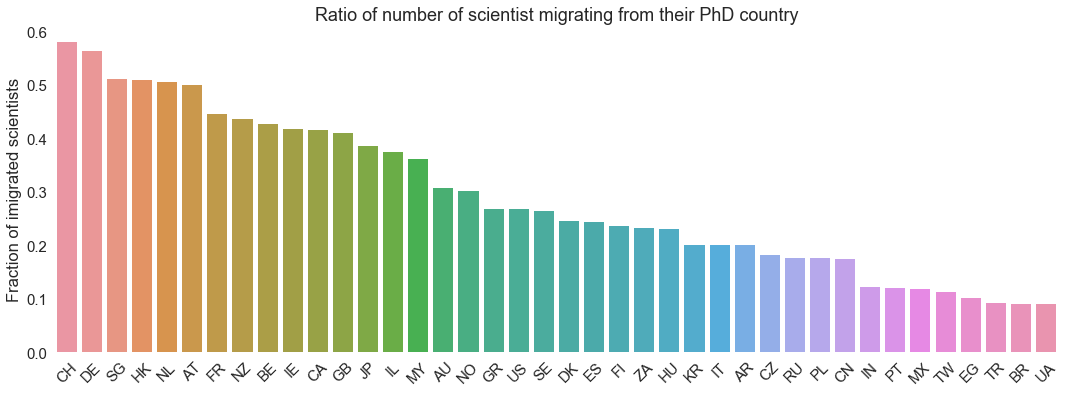

In [7]:
figure(figsize=(18,6))

''' 
Only selecting the top 40 countries with high total migratation rate. 
'''
top_str_cntry = most['phd_country'].tolist()
filter = scientists_df['phd_country'].isin(top_str_cntry)

most_mean = scientists_df[filter].groupby("phd_country").mean().sort_values(by="has_migrated", ascending=False).head(40)
most_mean["phd_country"] = most_mean.index
ax = sns.barplot(x="phd_country", y="has_migrated", data=most_mean)
plt.xticks(rotation=45)
ax.set_title('Ratio of number of scientist migrating from their PhD country')
ax.set_ylabel('Fraction of imigrated scientists')
ax.set_xlabel(' ');
ax.grid(0)
ax.set_frame_on(False)

Now the ordering has changed, US is no longer the leading brain-drain country. 

* Having access to the current location of the scientists, we can also answer how many of them have imigrated to be at their current location.

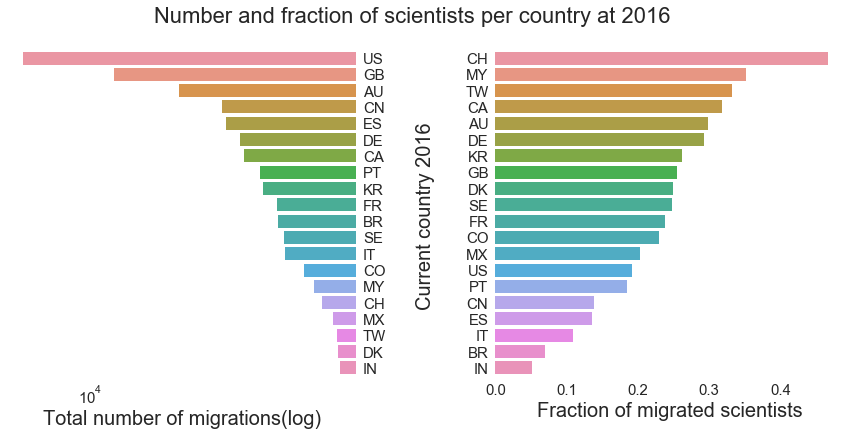

In [8]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
subplots_adjust(wspace=0.4)

# 
plt.suptitle('Number and fraction of scientists per country at 2016\n', size=22)

top2016 = scientists_df.groupby("country_2016").sum().sort_values(by="has_migrated", ascending=False).head(20)
top2016["country_2016"] = top2016.index
sns.barplot(y="country_2016", x="has_migrated", data=top2016, ax=ax1)
# ax1.

ax1.set_xlabel('Total number of migrations(log)', fontsize=20)
ax1.set_ylabel('Current country 2016 ', fontsize=20, labelpad=30)
ax1.set_xscale('log')
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

ax1.set_frame_on(False)
ax1.grid(0)

top16_cntry = top2016['country_2016'].tolist()
filter = scientists_df['country_2016'].isin(top16_cntry)

most16_mean = scientists_df[filter].groupby('country_2016').mean().sort_values(by="has_migrated", ascending=False).head(20)
most16_mean['country_2016'] = most16_mean.index
ax = sns.barplot(y='country_2016', x='has_migrated', data =most16_mean)
ax.set_xlabel('Fraction of migrated scientists', fontsize=20)
ax.set_ylabel(' ')

ax.grid(0)
ax.set_frame_on(False)
show()

In [10]:
def get_migrations_src_yr_2_2016(df=scientists_df, type='phd_country'):
    ''' Track the migration of `people` from phd_country to country_2016. Optionally, 
        limit this analysis to cohort of PhD's obtained between `phd_year_min` and 
        `phd_year_max`. '''
    
    filter=((df['has_migrated']==True) & (df['has_phd']==True))
    df = df[filter]
    if type=='earliest_country':
        df = df[(df['earliest_country'].notnull()) & (df['country_2016'].notnull())]

        countries = pd.concat([df['earliest_country'], df['co/untry_2016']])\
                            .dropna().sort_values().drop_duplicates().tolist()
            
        data = pd.DataFrame([len(countries)*[0] for i in countries], 
                            index = countries, columns = countries)
        
        for n, p in enumerate(df.itertuples()):
                data.loc[p[4], p[2]] += 1
                
                
    elif type=='phd_country':
        df = df[(df['phd_country'].notnull()) & (df['country_2016'].notnull())]

        countries = pd.concat([df['phd_country'], df['country_2016']])\
                            .dropna().sort_values().drop_duplicates().tolist()

        data = pd.DataFrame([len(countries)*[0] for i in countries], 
                            index = countries, columns = countries)
        
    
        for n, p in enumerate(df.itertuples()):
            data.loc[p[6], p[2]] += 1
            
    return data

In [11]:
data = get_migrations_src_yr_2_2016(scientists_df, type='phd_country')

In [12]:
data.head(2)

,AD,AE,AF,AG,AI,AL,AM,AO,AR,AS,...,VA,VC,VE,VI,VN,VU,YE,ZA,ZM,ZW
AD,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE,0,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
intid_country = dict(enumerate(scientists_df['country_2016'].unique().tolist()))

In [14]:
country_df = pd.read_csv('../input/Country.csv')
country_df.head(2)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0


In [15]:
country_code2name = dict(zip(country_df.Wb2Code, country_df.ShortName))

In [16]:
country_intid_2_fullname = {k:country_code2name.get(v)  for k, v in intid_country.items()}

In [17]:
''' Selecting only the top n elements'''
def get_topn_countires_with_outflow(orchid_df, n=10, type='phd_country'):
    
    if type=='earliest_country':
        data = get_migrations_src_yr_2_2016(orchid_df, type='earliest_country')
    elif type== 'phd_country':
        data = get_migrations_src_yr_2_2016(orchid_df, type='phd_country')

    matrix = data.values 
    row_sum=[np.sum(matrix[k,:]) for k in range(matrix.shape[0])]

    idx = np.array(row_sum).argsort()[::-1][:n]
    idx2n = {i:n for n, i in enumerate(idx) }
    mat2 = np.zeros((n,n))
    for i in idx:
        for j in idx:
            if i!=j:
                mat2[idx2n[i],idx2n[j]] = matrix[i,j]
    mat2 = np.int0(mat2)
    Labels = [country_intid_2_fullname[i] for i in idx]
    return mat2, Labels
    

In [29]:
import plotly.plotly as py
import plotly.offline as pyof # Interactive plotting library

from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
import numpy as np
pyof.init_notebook_mode(connected=True)


def doCircleRibbonGraph(matrix, labels, colors, plot_size=400, title='Phd Country'):
    plot_title = "Flow diagram\n" +title +" to 2016 Country"
    
    ideo_colors=colors#_ls

    def check_data(data_matrix):
        L, M=data_matrix.shape
        if L!=M:
            raise ValueError('Data array must have (n,n) shape')
        return L

    L=check_data(matrix)
    PI=np.pi

    def moduloAB(x, a, b): #maps a real number onto the unit circle identified with 
                           #the interval [a,b), b-a=2*PI
            if a>=b:
                raise ValueError('Incorrect interval ends')
            y=(x-a)%(b-a)
            return y+b if y<0 else y+a

    def test_2PI(x):
        return 0<= x <2*PI

    row_sum=[np.sum(matrix[k,:]) for k in range(L)]

    #set the gap between two consecutive ideograms
    gap=2*PI*0.002
    ideogram_length=2*PI*np.asarray(row_sum)/sum(row_sum)-gap*np.ones(L)

    def get_ideogram_ends(ideogram_len, gap):
        ideo_ends=[]
        left=0
        for k in range(len(ideogram_len)):
            right=left+ideogram_len[k]
            ideo_ends.append([left, right])
            left=right+gap
        return ideo_ends

    ideo_ends=get_ideogram_ends(ideogram_length, gap)

    def make_ideogram_arc(R, phi, a=50):
        # R is the circle radius
        # phi is the list of ends angle coordinates of an arc
        # a is a parameter that controls the number of points to be evaluated on an arc
        if not test_2PI(phi[0]) or not test_2PI(phi[1]):
            phi=[moduloAB(t, 0, 2*PI) for t in phi]
        length=(phi[1]-phi[0])% 2*PI
        nr=5 if length<=PI/4 else int(a*length/PI)

        if phi[0] < phi[1]:
            theta=np.linspace(phi[0], phi[1], nr)
        else:
            phi=[moduloAB(t, -PI, PI) for t in phi]
            theta=np.linspace(phi[0], phi[1], nr)
        return R*np.exp(1j*theta)

    z=make_ideogram_arc(1.3, [11*PI/6, PI/17])

    def map_data(data_matrix, row_value, ideogram_length):
        mapped=np.zeros(data_matrix.shape)
        for j  in range(L):
            mapped[:, j]=ideogram_length*data_matrix[:,j]/row_value
        return mapped

    mapped_data=map_data(matrix, row_sum, ideogram_length)
    idx_sort=np.argsort(mapped_data, axis=1)

    def make_ribbon_ends(mapped_data, ideo_ends,  idx_sort):
        L=mapped_data.shape[0]
        ribbon_boundary=np.zeros((L,L+1))
        for k in range(L):
            start=ideo_ends[k][0]
            ribbon_boundary[k][0]=start
            for j in range(1,L+1):
                J=idx_sort[k][j-1]
                ribbon_boundary[k][j]=start+mapped_data[k][J]
                start=ribbon_boundary[k][j]
        return [[(ribbon_boundary[k][j],ribbon_boundary[k][j+1] ) for j in range(L)] for k in range(L)]

    ribbon_ends=make_ribbon_ends(mapped_data, ideo_ends,  idx_sort)

    def control_pts(angle, radius):
        #angle is a  3-list containing angular coordinates of the control points b0, b1, b2
        #radius is the distance from b1 to the  origin O(0,0) 

        if len(angle)!=3:
            raise InvalidInputError('angle must have len =3')
        b_cplx=np.array([np.exp(1j*angle[k]) for k in range(3)])
        b_cplx[1]=radius*b_cplx[1]
        return zip(b_cplx.real, b_cplx.imag)



    def ctrl_rib_chords(l, r, radius):
        # this function returns a 2-list containing control poligons of the two quadratic Bezier
        #curves that are opposite sides in a ribbon
        #l (r) the list of angular variables of the ribbon arc ends defining 
        #the ribbon starting (ending) arc 
        # radius is a common parameter for both control polygons
        if len(l)!=2 or len(r)!=2:
            raise ValueError('the arc ends must be elements in a list of len 2')
        return [control_pts([l[j], (l[j]+r[j])/2, r[j]], radius) for j in range(2)]

    ribbon_color=[L*[ideo_colors[k]] for k in range(L)]

    def make_q_bezier(b):# defines the Plotly SVG path for a quadratic Bezier curve defined by the 
                         #list of its control points
#         if len(b)!=3:
#             raise valueError('control poligon must have 3 points')
        A, B, C=b
        return 'M '+str(A[0])+',' +str(A[1])+' '+'Q '+\
                    str(B[0])+', '+str(B[1])+ ' '+\
                    str(C[0])+', '+str(C[1])

    b=[(1,4), (-0.5, 2.35), (3.745, 1.47)]

    make_q_bezier(b);

    def make_ribbon_arc(theta0, theta1):

        if test_2PI(theta0) and test_2PI(theta1):
            if theta0 < theta1:
                theta0= moduloAB(theta0, -PI, PI)
                theta1= moduloAB(theta1, -PI, PI)
                if theta0*theta1>0:
                    raise ValueError('incorrect angle coordinates for ribbon')

            nr=int(40*(theta0-theta1)/PI)
            if nr<=2: nr=3
            theta=np.linspace(theta0, theta1, nr)
            pts=np.exp(1j*theta)# points on arc in polar complex form

            string_arc=''
            for k in range(len(theta)):
                string_arc+='L '+str(pts.real[k])+', '+str(pts.imag[k])+' '
            return   string_arc
        else:
            raise ValueError('the angle coordinates for an arc side of a ribbon must be in [0, 2*pi]')

    make_ribbon_arc(np.pi/3, np.pi/6);

    def make_layout(title, plot_size):
        axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
              zeroline=False,
              showgrid=False,
              showticklabels=False,
              title=''
              )

        return Layout(title=title,
                      xaxis=XAxis(axis),
                      yaxis=YAxis(axis),
                      showlegend=False,
                      width=plot_size,
                      height=plot_size,
                      margin=Margin(t=25, b=25, l=25, r=25),
                      hovermode='closest',
                      shapes=[]# to this list one appends below the dicts defining the ribbon,
                               #respectively the ideogram shapes
                     )


    def make_ideo_shape(path, line_color, fill_color):
        #line_color is the color of the shape boundary
        #fill_collor is the color assigned to an ideogram
        return  dict(
                      line=Line(
                      color=line_color,
                      width=0.45
                     ),

                path=  path,
                type='path',
                fillcolor=fill_color,
            )

    def make_ribbon(l, r, line_color, fill_color, radius=0.2):
        #l=[l[0], l[1]], r=[r[0], r[1]]  represent the opposite arcs in the ribbon 
        #line_color is the color of the shape boundary
        #fill_color is the fill color for the ribbon shape
        poligon=ctrl_rib_chords(l,r, radius)
        b,c =poligon
        b = list(b)
        c = list(c)
        return  dict(
                    line=Line(
                    color=line_color, width=0.5
                ),
                path=  make_q_bezier(b)+make_ribbon_arc(r[0], r[1])+
                       make_q_bezier(c[::-1])+make_ribbon_arc(l[1], l[0]),
                type='path',
                fillcolor=fill_color,
            )

    def make_self_rel(l, line_color, fill_color, radius):
        #radius is the radius of Bezier control point b_1
        b=control_pts([l[0], (l[0]+l[1])/2, l[1]], radius)
        return  dict(
                    line=Line(
                    color=line_color, width=0.5
                ),
                path=  make_q_bezier(b)+make_ribbon_arc(l[1], l[0]),
                type='path',
                fillcolor=fill_color,
            )

    def invPerm(perm):
        # function that returns the inverse of a permutation, perm
        inv = [0] * len(perm)
        for i, s in enumerate(perm):
            inv[s] = i
        return inv

    layout=make_layout(plot_title, plot_size);

    radii_sribb=[0.4, 0.30, 0.35, 0.39, 0.12]# these value are set after a few trials 

    ribbon_info=[]
    for k in range(L):

        sigma=idx_sort[k]
        sigma_inv=invPerm(sigma)
        for j in range(k, L):
            if matrix[k][j]==0 and matrix[j][k]==0: continue
            eta=idx_sort[j]
            eta_inv=invPerm(eta)
            l=ribbon_ends[k][sigma_inv[j]]

            if j==k:
                layout['shapes'].append(make_self_rel(l, 'rgb(175,175,175)' ,
                                        ideo_colors[k], radius=radii_sribb[k]))
                z=0.9*np.exp(1j*(l[0]+l[1])/2)
                #the text below will be displayed when hovering the mouse over the ribbon
                text=labels[k]+' donated $'+ '{:d}'.format(matrix[k][k])+' to theirself',
                ribbon_info.append(Scatter(x=z.real,
                                           y=z.imag,
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ideo_colors[k]),
                                           text=text,
                                           hoverinfo='text'
                                           )
                                  )
            else:
                r=ribbon_ends[j][eta_inv[k]]
                zi=0.9*np.exp(1j*(l[0]+l[1])/2)
                zf=0.9*np.exp(1j*(r[0]+r[1])/2)
                #texti and textf are the strings that will be displayed when hovering the mouse 
                #over the two ribbon ends
                texti=labels[k]+' Migrated $'+ '{:d}'.format(matrix[k][j])+' to '+\
                labels[j],

                textf=labels[j]+' Migrated $'+ '{:d}'.format(matrix[j][k])+' to '+\
                labels[k],

 
                ribbon_info.append(Scatter(x=zi.real,
                                           y=zi.imag,
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                           text=texti,
                                           hoverinfo='text'
                                           )
                                  ),
                ribbon_info.append(Scatter(x=zf.real,
                                           y=zf.imag,
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                           text=textf,
                                           hoverinfo='text'
                                           )
                                  )
                r=(r[1], r[0])#IMPORTANT!!!  Reverse these arc ends because otherwise you get
                              # a twisted ribbon
                #append the ribbon shape
                layout['shapes'].append(make_ribbon(l, r, 'rgb(175,175,175)' , ribbon_color[k][j]))



    ideograms=[]
    for k in range(len(ideo_ends)):
        z= make_ideogram_arc(1.1, ideo_ends[k])
        zi=make_ideogram_arc(1.0, ideo_ends[k])
        m=len(z)
        n=len(zi)
        ideograms.append(Scatter(x=z.real,
                                 y=z.imag,
                                 mode='lines',
                                 line=Line(color=ideo_colors[k], shape='spline', width=0.25),
                                 text='{:d}'.format(row_sum[k])+' scientists has migrated from '+labels[k],
                                 hoverinfo='text'
                                 )
                         )


        path='M '
        for s in range(m):
            path+=str(z.real[s])+', '+str(z.imag[s])+' L '

        Zi=np.array(zi.tolist()[::-1])

        for s in range(m):
            path+=str(Zi.real[s])+', '+str(Zi.imag[s])+' L '
        path+=str(z.real[0])+' ,'+str(z.imag[0])
        layout['shapes'].append(make_ideo_shape(path,'rgb(150,150,150)' , ideo_colors[k]))

    data = Data(ideograms+ribbon_info);
    fig = Figure(data=data, layout=layout)

    url = pyof.iplot(fig, filename='chord-diagram-country-migration')
    py.image.save_as(fig, filename='chord-diagram-country-migration.png')

In [30]:
import matplotlib.colors as cl
import matplotlib.cm as cmx

def get_colors(n):
    '''
    Checking the color pallete
    '''
    jet = cm = plt.get_cmap('RdYlGn') 
    cNorm  = cl.Normalize(vmin=0, vmax=n)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    colorvals = [ 'rgba'+str(scalarMap.to_rgba(i)) for i in range(n)]
    return colorvals

In [31]:
if __name__ == "__main__":
    n = 10
    colors = get_colors(n)
    mat, labs = get_topn_countires_with_outflow(scientists_df, n, type='phd_country')
    doCircleRibbonGraph(mat, labs, colors=colors, plot_size=500, title='Phd Country' )

# chord plot <img src="chord-diagram-country-migration.png">

# Conclusion and future work:

Chord diagrams are one of the simplest visualization methods to display the inter-relationship between different object. In this case the imigration of scientists between different coutnries. The functional format of the doCircleRibbonGraph allows one to plug any matrix representing the interaction of different enteties ( adjacency matrix of an interaction network) into a graphical representation that makes it easier to draw insight form the data.

Goal: Ideally I wish to toggle/hide some of the code to bring more emphasize on the output.

Please let me know if you have any suggestions and upvote if you liked this kernell.